In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import math
from tensorflow.keras.utils import plot_model

In [ ]:
# Load the data from CSV
data = pd.read_csv('/content/data AM.csv')

# Select features (laser power, scan speed, hatch spacing) and target variables (d*, Solid ratio)
X = data[['Laser power (W)', 'Scan speed (mm/s)', 'Hatch spacing (μm)']]
y_d_star = data['d*']
y_solid_ratio = data['Solid ratio']

# Split the data into training and testing sets for both targets
X_train, X_test, y_train_d_star, y_test_d_star, y_train_solid_ratio, y_test_solid_ratio = train_test_split(
    X, y_d_star, y_solid_ratio, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest model for d*
rf_model_d_star = RandomForestRegressor(n_estimators=100)
rf_model_d_star.fit(X_train, y_train_d_star)

# Train the Gradient Boosting model for d*
gb_model_d_star = GradientBoostingRegressor(n_estimators=100)
gb_model_d_star.fit(X_train, y_train_d_star)

# Train the Random Forest model for Solid ratio
rf_model_solid_ratio = RandomForestRegressor(n_estimators=100)
rf_model_solid_ratio.fit(X_train, y_train_solid_ratio)

# Train the Gradient Boosting model for Solid ratio
gb_model_solid_ratio = GradientBoostingRegressor(n_estimators=100)
gb_model_solid_ratio.fit(X_train, y_train_solid_ratio)

GradientBoostingRegressor()

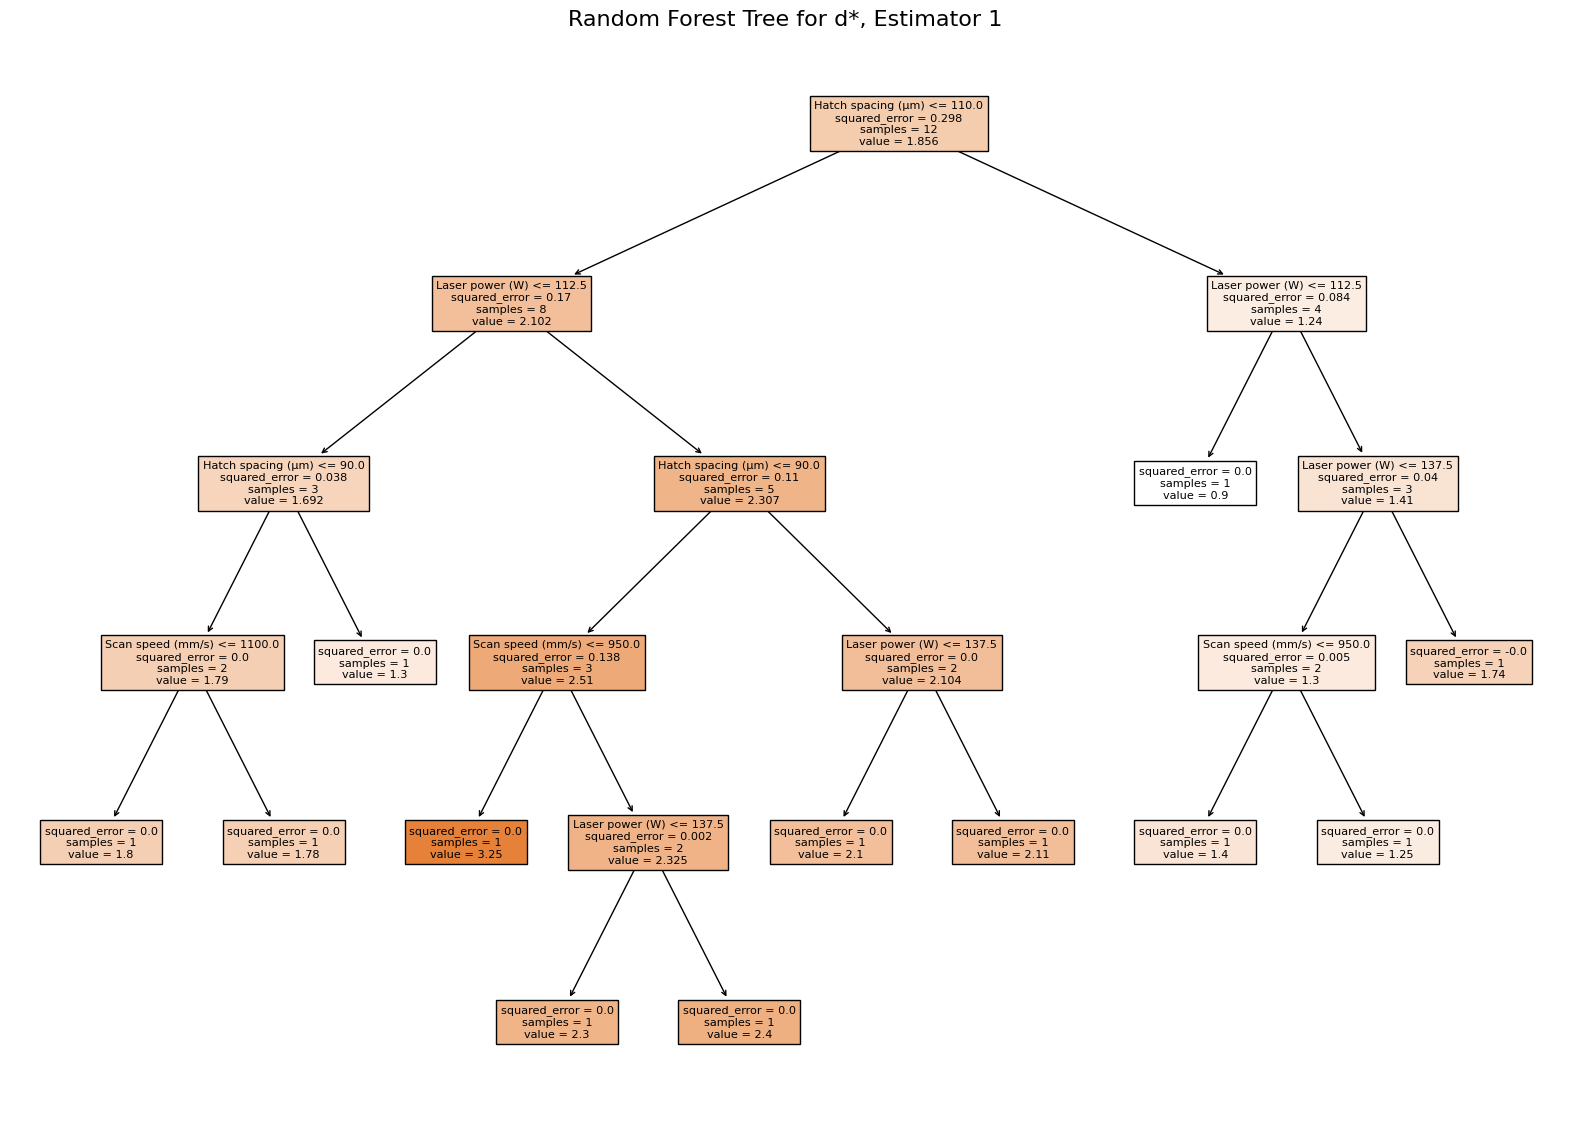

In [ ]:
# Visualize the first tree in the Random Forest model for d* with increased figure size
plt.figure(figsize=(20, 14))
plot_tree(rf_model_d_star.estimators_[0], filled=True, feature_names=X_train.columns)
plt.title('Random Forest Tree for d*, Estimator 1', fontsize=16)
plt.show()


In [ ]:
def predict_solid_ratio(laser_power, scan_speed, hatch_spacing):
    # Prepare the input features in the same format as your training data
    input_data = np.array([[laser_power, scan_speed, hatch_spacing]])

    # Make predictions using the pre-trained model
    output_prediction = gb_model_solid_ratio.predict(input_data)

    return output_prediction[0]

# Example usage:
laser_power_input = float(input("Enter Laser Power (W): "))
scan_speed_input = float(input("Enter Scan Speed (mm/s): "))
hatch_spacing_input = float(input("Enter Hatch Spacing (μm): "))

predicted_solid_ratio = predict_solid_ratio(laser_power_input, scan_speed_input, hatch_spacing_input)

print("Predicted Solid Ratio:", predicted_solid_ratio)


In [ ]:
# Make predictions on the test set for both models for d*
y_pred_rf_d_star = rf_model_d_star.predict(X_test)
y_pred_gb_d_star = gb_model_d_star.predict(X_test)

# Make predictions on the test set for both models for Solid ratio
y_pred_rf_solid_ratio = rf_model_solid_ratio.predict(X_test)
y_pred_gb_solid_ratio = gb_model_solid_ratio.predict(X_test)

In [ ]:
# Evaluate the models for d*
mse_rf_d_star = mean_squared_error(y_test_d_star, y_pred_rf_d_star)
mse_gb_d_star = mean_squared_error(y_test_d_star, y_pred_gb_d_star)

# Evaluate the models for Solid ratio
mse_rf_solid_ratio = mean_squared_error(y_test_solid_ratio, y_pred_rf_solid_ratio)
mse_gb_solid_ratio = mean_squared_error(y_test_solid_ratio, y_pred_gb_solid_ratio)


In [ ]:
# Print MSE for both models and both target variables
print(f'Random Forest Mean Squared Error (d*): {mse_rf_d_star}')
print(f'Gradient Boosting Mean Squared Error (d*): {mse_gb_d_star}')

# Create actual vs predicted tables for both models and both target variables
result_rf_d_star = pd.DataFrame({'Actual (d*)': y_test_d_star, 'Predicted (d* - Random Forest)': y_pred_rf_d_star})
result_gb_d_star = pd.DataFrame({'Actual (d*)': y_test_d_star, 'Predicted (d* - Gradient Boosting)': y_pred_gb_d_star})
result_rf_solid_ratio = pd.DataFrame({'Actual (Solid ratio)': y_test_solid_ratio, 'Predicted (Solid ratio - Random Forest)': y_pred_rf_solid_ratio})
result_gb_solid_ratio = pd.DataFrame({'Actual (Solid ratio)': y_test_solid_ratio, 'Predicted (Solid ratio - Gradient Boosting)': y_pred_gb_solid_ratio,
                                      'Percentage Error': ((y_test_solid_ratio - y_pred_gb_solid_ratio) / y_test_solid_ratio) * 100})

# Print actual vs predicted tables for both models and both target variables
print("\nRandom Forest (d*) - Actual vs Predicted:")
print(result_rf_d_star)
print("\nGradient Boosting (d*) - Actual vs Predicted:")
print(result_gb_d_star)


Random Forest Mean Squared Error (d*): 0.06606888999999988
Gradient Boosting Mean Squared Error (d*): 0.04866078296107911

Random Forest (d*) - Actual vs Predicted:
    Actual (d*)  Predicted (d* - Random Forest)
8          0.40                          0.7880
13         1.93                          1.9761
9          2.50                          2.3400
21         2.94                          2.5243
0          1.85                          1.9308
11         2.24                          2.0430

Gradient Boosting (d*) - Actual vs Predicted:
    Actual (d*)  Predicted (d* - Gradient Boosting)
8          0.40                            0.663497
13         1.93                            1.965678
9          2.50                            2.509875
21         2.94                            2.533332
0          1.85                            2.084953
11         2.24                            2.215883


In [ ]:
print(f'Random Forest Mean Squared Error (Solid ratio): {mse_rf_solid_ratio}')
print(f'Gradient Boosting Mean Squared Error (Solid ratio): {mse_gb_solid_ratio}')
print("\nRandom Forest (Solid ratio) - Actual vs Predicted:")
print(result_rf_solid_ratio)
print("\nGradient Boosting (Solid ratio) - Actual vs Predicted:")
print(result_gb_solid_ratio)

Random Forest Mean Squared Error (Solid ratio): 0.00029620976666666117
Gradient Boosting Mean Squared Error (Solid ratio): 9.193585764825242e-05

Random Forest (Solid ratio) - Actual vs Predicted:
    Actual (Solid ratio)  Predicted (Solid ratio - Random Forest)
8                  0.830                                  0.86990
13                 0.990                                  0.99544
9                  1.000                                  0.99755
21                 1.000                                  0.99795
0                  0.980                                  0.97040
11                 0.997                                  0.98970

Gradient Boosting (Solid ratio) - Actual vs Predicted:
    Actual (Solid ratio)  Predicted (Solid ratio - Gradient Boosting)  \
8                  0.830                                     0.848420   
13                 0.990                                     0.996981   
9                  1.000                                     0.996

In [ ]:
print(rf_model_d_star.feature_importances_)
print(gb_model_d_star.feature_importances_)
print(rf_model_solid_ratio.feature_importances_)
print(gb_model_solid_ratio.feature_importances_)

## Grain Dia


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load your CSV into a DataFrame (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('/content/grain dia.csv')

# Selecting relevant columns
X = data[['Laser power (W)', 'Scan speed (mm/s)', 'Hatch spacing (μm)']]
y = data['Avg Grain Dia XZ  (μm)']

# Extract relevant columns
power = data['Laser power (W)']
scan_speed = data['Scan speed (mm/s)']
grain_dia = data['Avg Grain Dia XZ  (μm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
data.columns

Index(['S.No.', 'Laser power (W)', 'Scan speed (mm/s)', 'Hatch spacing (μm)',
       'Melt pool width (μm)', 'Melt pool depth (μm)', 'Cooling Rate',
       'Temperature Gradient', 'Avg Grain Dia XY (μm)',
       'Avg Grain Dia YZ  (μm)', 'Avg Grain Dia XZ  (μm)'],
      dtype='object')

In [ ]:
data1 = data[['Laser power (W)','Scan speed (mm/s)', 'Hatch spacing (μm)', 'Avg Grain Dia XZ  (μm)']]

In [ ]:
data1.head()

,Laser power (W),Scan speed (mm/s),Hatch spacing (μm),Avg Grain Dia XZ (μm)
0,100,700,0.10,31.870
1,300,700,0.10,66.987
2,500,700,0.10,134.971
3,100,700,0.11,31.541
4,300,700,0.11,70.144


In [ ]:
# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(data, x='Laser power (W)', y='Scan speed (mm/s)', z='Avg Grain Dia XZ  (μm)',
                    labels={'Avg Grain Dia XZ  (μm)': 'Average Grain Diameter (μm)'},
                    title='3D Scatter Plot: Laser Power vs Scan Speed vs Grain Diameter')

# Show the plot in Colab
fig.show()

In [ ]:
# Create a simple neural network model
model = keras.Sequential([
    layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.03), input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.03),
    layers.Dense(16, activation=keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.03),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=800, batch_size=64, validation_split=0.25, verbose=1, callbacks=[checkpoint])

Epoch 1/800
1/1 [==============================] - ETA: 0s - loss: 51.2726
Epoch 1: val_loss improved from inf to 51.73771, saving model to best_model.h5
1/1 [==============================] - 1s 833ms/step - loss: 51.2726 - val_loss: 51.7377
Epoch 2/800
1/1 [==============================] - ETA: 0s - loss: 51.2793
Epoch 2: val_loss improved from 51.73771 to 51.72456, saving model to best_model.h5
1/1 [==============================] - 0s 56ms/step - loss: 51.2793 - val_loss: 51.7246
Epoch 3/800
1/1 [==============================] - ETA: 0s - loss: 51.2921
Epoch 3: val_loss improved from 51.72456 to 51.71152, saving model to best_model.h5
1/1 [==============================] - 0s 58ms/step - loss: 51.2921 - val_loss: 51.7115
Epoch 4/800
1/1 [==============================] - ETA: 0s - loss: 51.2081
Epoch 4: val_loss improved from 51.71152 to 51.69838, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 60ms/step - loss: 51.2081 - val_loss: 51.6984
Epoch 5/800
1/1 [==============================] - ETA: 0s - loss: 51.2325
Epoch 5: val_loss improved from 51.69838 to 51.68495, saving model to best_model.h5
1/1 [==============================] - 0s 59ms/step - loss: 51.2325 - val_loss: 51.6850
Epoch 6/800
1/1 [==============================] - ETA: 0s - loss: 51.1903
Epoch 6: val_loss improved from 51.68495 to 51.67166, saving model to best_model.h5
1/1 [==============================] - 0s 54ms/step - loss: 51.1903 - val_loss: 51.6717
Epoch 7/800
1/1 [==============================] - ETA: 0s - loss: 51.1787
Epoch 7: val_loss improved from 51.67166 to 51.65815, saving model to best_model.h5
1/1 [==============================] - 0s 56ms/step - loss: 51.1787 - val_loss: 51.6582
Epoch 8/800
1/1 [==============================] - ETA: 0s - loss: 51.1561
Epoch 8: val_loss improved from 51.65815 to 51.64441, saving model to best_model.h5
1/1 [=======

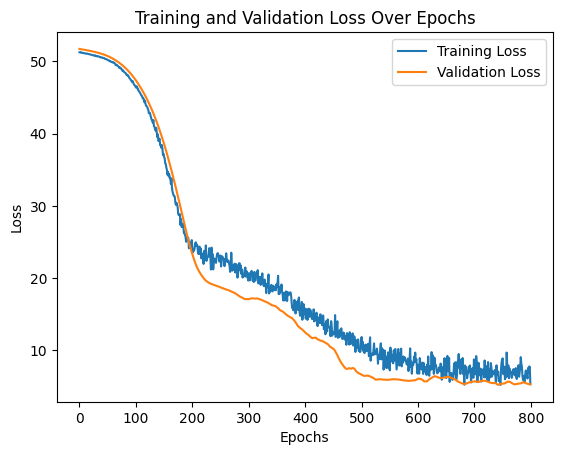

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

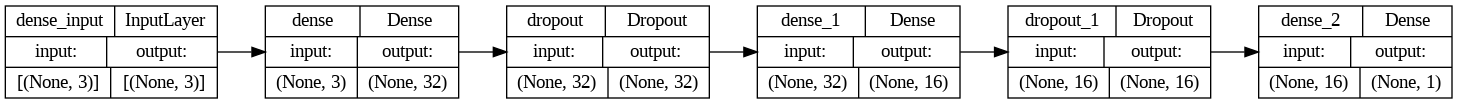

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR")

In [ ]:
model = keras.models.load_model('best_model.h5')

# Evaluate the model
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = y_pred_nn.flatten()  #Flatten the predictions to match the shape of y_test

print('Mean Absolute Error (Neural Network):', mean_absolute_error(y_test, y_pred_nn))
print('Mean Squared Error (Neural Network):', mean_squared_error(y_test, y_pred_nn))
print('Root Mean Squared Error (Neural Network):', mean_squared_error(y_test, y_pred_nn, squared=False))

# Print actual vs predicted values
df_results_nn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nn})
df_results_nn['Percentage Error'] = ((df_results_nn['Actual'] - df_results_nn['Predicted']) / df_results_nn['Actual']) * 100
print(df_results_nn)

1/1 [==============================] - 0s 62ms/step
Mean Absolute Error (Neural Network): 5.153793215433755
Mean Squared Error (Neural Network): 40.768176436633034
Root Mean Squared Error (Neural Network): 6.384996197072715
    Actual  Predicted  Percentage Error
8   89.565  82.678429          7.688909
13  48.074  47.769650          0.633088
9   24.154  27.731993        -14.813251
21  18.644  17.629021          5.444000
0   31.870  41.203568        -29.286374
11  84.514  74.708702         11.601981


In [ ]:
model.save('/content/grain_size3.8mae.keras')